### On 23 Jan 2016 a group of 22 philosophy buffs completed a survey to determine whether there are indeed Five Core Beliefs. The following analysis is the result.

**We have a total of 10 questions each posed as a pair of polar opposite beliefs. First, we would like to remind ourselves what the questions are.**

|5 |4 |3 |2 |1 |
|--- |--- |--- |--- |--- |
|***Strongly believe in (A)*** |***Somewhat believe in (A)***  |***Undecided*** |***Somewhat believe in (B)***  |***Strongly believe in (B)***|

1. **Religious vs. atheist:** Belief in A) mainstream theological systems such as Islam and Christianity, or conversely, B) scepticism about the existence of god(s).

2. **Spiritual vs. materialist:** Belief in A) non-material phenomena such as spirits, the paranormal, a non-material soul etc, or conversely, B) the belief only in what science can reliably observe.

3. **Individualist vs. communitarian:** Belief in A) self-interest - strong belief in need to meet your own needs, through maximizing pleasure, happiness or other fundamental values, or belief in B) the good of all before the good of the individual.

4. **Democratic vs. authoritarian:** Belief in A) common, social institutions and the exercise of reason to sustain and improve them (through contracts, constitutions etc) , or conversely belief in B) the need for authoritative, powerful leadership.

5. **Egalitarian vs. aristocratic:** Belief in A) the importance of equality in human society, and forms of participation through equality, or the converse, B) tolerance of inequalities (financial, gender, race) and the over-riding value of some voices over others.

6. **Materialist vs. non-materialist of the mind:** Belief that A) the human mind will ultimately be understood in terms of scientifically observable physical/energy/informational processes, or conversely, B) that the mind is ultimately not explicable in materialistic terms.

7. **Agency vs. determinism:** Belief that A) we have genuine choice about at least some of our behaviour (free will), or conversely that B) our behaviour is determined,  and that any sense of free-will is illusory.

8. **Epistemological certainty vs. skepticism:** Belief that A) at least some knowledge can be sure/certain/undoubted, or conversely that B) no knowledge is sufficiently sure that it is certain, and beliefs are the most certain types of knowledge.

9. **Existential meaning vs. meaninglessness:** Belief that A) human life is meaningful,  and has genuine significance, or conversely that B) it has no meaning and is an arbitrary and accidental sequence of events of no significance.

10. **Moral absolutism vs. relativism:** Belief that A) there are absolute moral values, which remain true regardless of circumstances or consequences, or conversely belief that B) moral values can change and are always relative to a particular society or time.

## Summary of results from 23 Jan 2016 (n = 22)

In [1]:
bl <- read.csv('Core Beliefs experiment.csv', header=F)
names(bl) <- c('Religious','Spiritual','Individualist','Democratic','Egalitarian',
               'Mind.Materialist','Agency','Epist.Certainty','Exist.Meaning',
               'Moral.Absolutist')
bmat <- as.matrix(bl)

### 1. Average scores for each question (out of maximum of 5)

In [2]:
av <- round(colSums(bl)/nrow(bl),2)
av

Religious        Spiritual    Individualist       Democratic 
            1.95             2.14             3.45             4.00 
     Egalitarian Mind.Materialist           Agency  Epist.Certainty 
            3.86             3.75             3.45             3.64 
   Exist.Meaning Moral.Absolutist 
            3.09             3.00

### 2. Distribution of scores for each question (red lines denote the average)

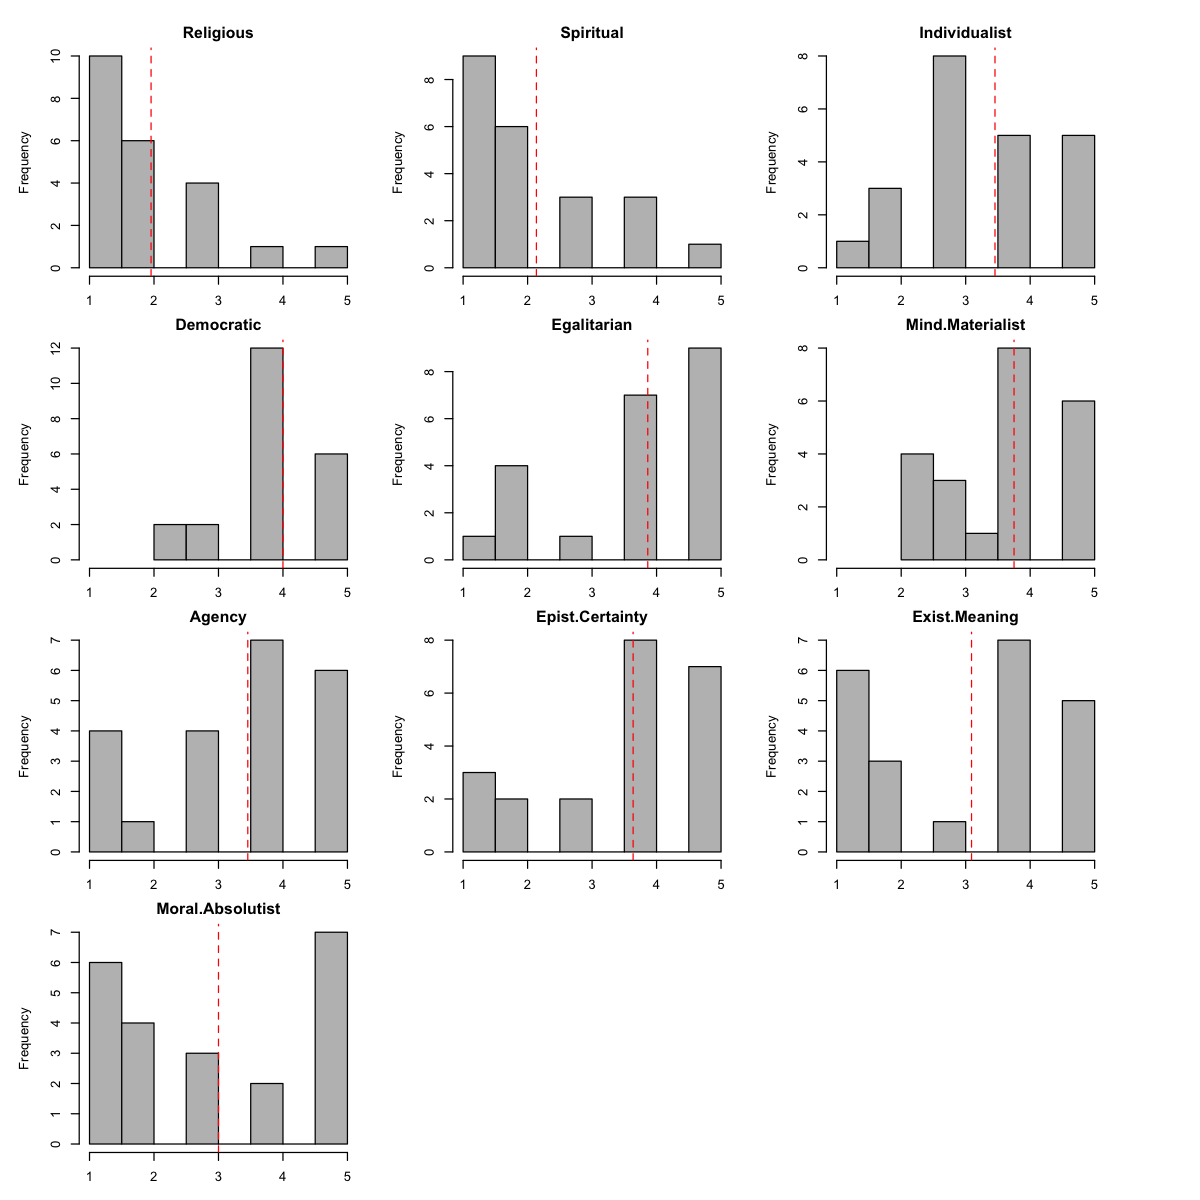

In [3]:
options(repr.plot.width=10, repr.plot.height=10)
par(mar = c(2, 4, 2, 2), mfrow = c(4, 3), oma=c(1,1,1,4))
#colors <- c(palette()[1:8],palette()[1:2])
for(i in 1:10){
    hist(bl[,i],breaks=10,col='grey',main=names(bl[i]),xlim=c(1,5),ylab='Frequency')
    abline(v=mean(bl[,i]),col='red',lty=2,cex=1.5)
    }

### 3. How many factors are required to satisfactorily explain variation in data?

**We use principal components analysis to extract orthogonal factors from the data and note the percentage of variance in the data accounted by each factor.** 

Loading required package: MASS


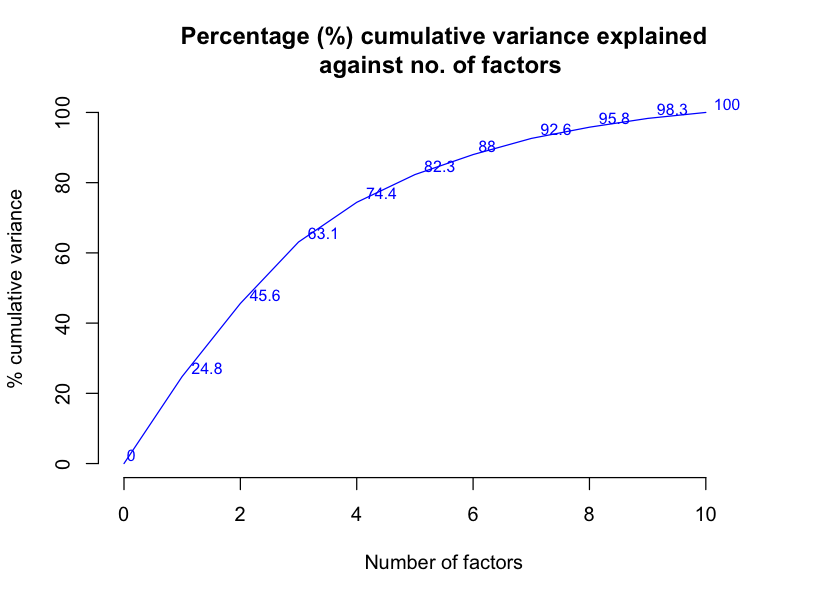

In [4]:
#Principal components analysis
bpc <- princomp(bl)
result <- data.frame('factors'=c(1:10),'variance'=(bpc$sdev)^2/sum((bpc$sdev)^2)*100)
#Cumulative variance
cuml <- c()
for (i in 1:10){
  if(i==1)
    cuml[i] <- round(result$variance[i],1)
  else{
    k = i-1
    cuml[i] <- round(result$variance[i] + cuml[k],1)
  }
}
result$cuml.variance <- cuml
result <- rbind(c(0,0,0),result)
#Plot
options(repr.plot.width=7, repr.plot.height=5)
plot(c(0:10),result$cuml.variance, type='l',col='blue',cex=0.8,ylim=c(0,100),xlim=c(0,11),
     bty='n',
     xlab='Number of factors', ylab='% cumulative variance',
     main='Percentage (%) cumulative variance explained\nagainst no. of factors ')
library(calibrate)
textxy(result$factors,result$cuml.variance,result$cuml.variance,cex=0.8, col='blue')

**The first four (4) factors are able to explain ~75% of variation in data.**

### 4. Which questions load highly on each factor?
**Large positive loadings suggest that high scores on the question are significant on that factor; large negative loadings suggest low scores are significant on that factor. For e.g. a loading of -0.33 by the Religiosity question on Factor 1 indicates that lack of religiosity is somewhat important to account for that factor.**

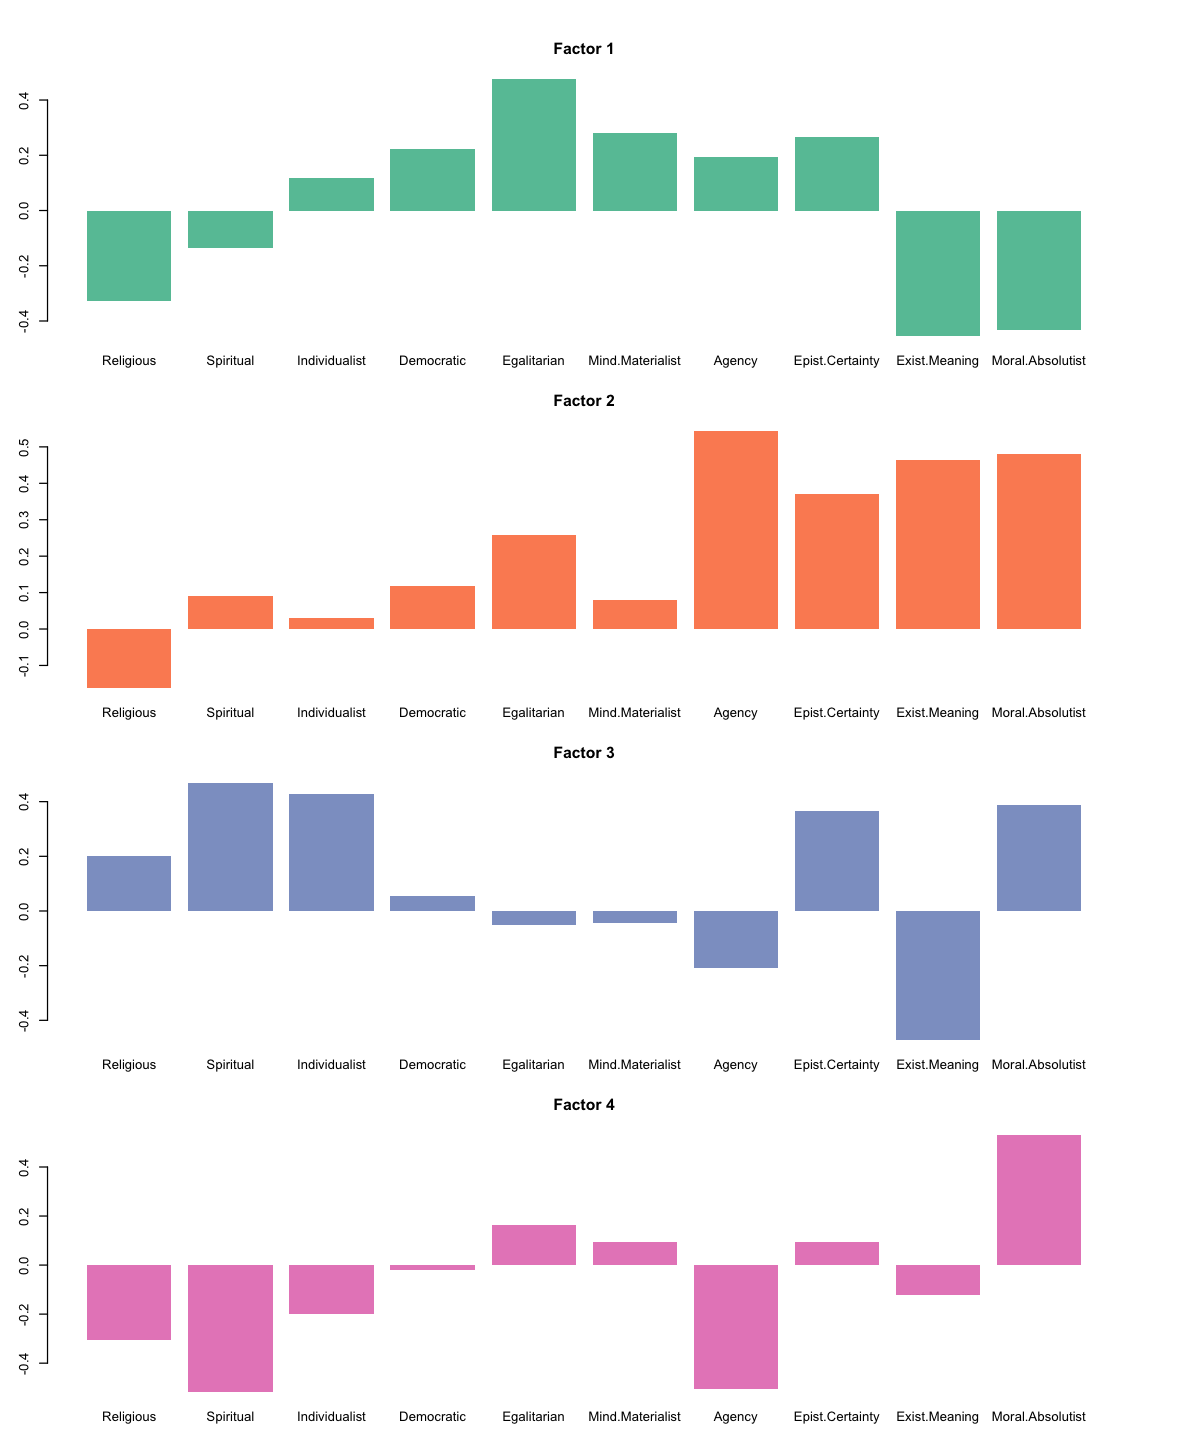

In [5]:
#bpc$loadings
options(repr.plot.width=10, repr.plot.height=12)
library(RColorBrewer)
colors <- brewer.pal(4,'Set2')
par(mar = c(2, 2, 4, 1), mfrow = c(4, 1), oma=c(1,1,1,4))
for (i in 1:4){
    bp <- barplot(bpc$loadings[,i],main=paste0('Factor ',i),col=colors[i],border=NA)
    text(bpc$loadings[,i],bp,round(bpc$loadings[,i],2))
}

***Please bear in mind the very small sample size undergirding these interpretations; if the factors do not seem sensible it is likely that A) all factors need to be taken into account (individuals seldom score exclusively on one factor) or B) factors are accounting for no more than a few idiosyncratic responses. With a greater sample size, some of these interpretations might cease to exist.***

**While the Religiosity question loads negatively on both the first and second factors, the questions on Existential Meaning and Moral Absolutism load in opposite directions between them (one can be an atheist who believes that the universe is ultimately meaningless and moral standards are relative, or an atheist who believes in existential meaning and absolute morals). The latter kind of atheist also scores more highly on questions of whether there is free will and epistemological certainty.**

**The Religiosity and Spirituality questions load positively on the third factor, clearly distinguishing itself from the first two factors. Interestingly, the Individualist question also loads positively on this factor, while the question on Existential Meaning loads negatively (Religious + Spiritual and that self-interest is paramount but that the universe is ultimately meaningless?)**

**On the fourth factor, Religiosity and Spirituality questions load even more negatively than the first two factors. Atheists scoring highly on the fourth factor are distinguished by skepticism on free will compared to the first two factors.**

### 5. How do individuals score on each factor?

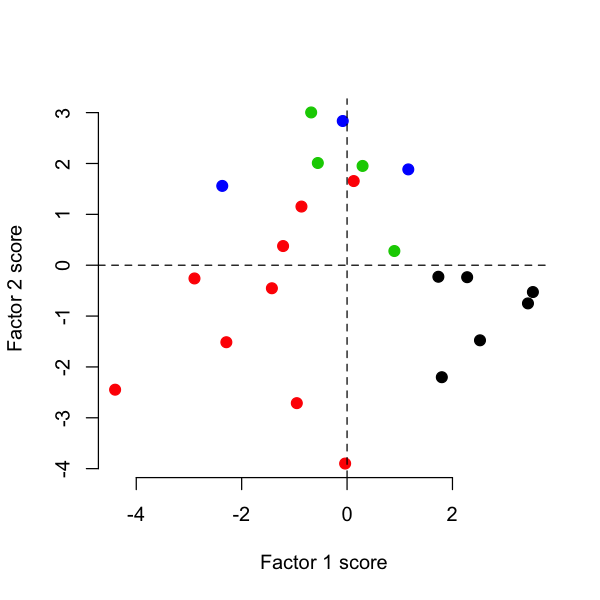

In [7]:
library(cluster)
bdist <- dist(bmat)
p <- pam(bdist,4)
options(repr.plot.width=5, repr.plot.height=5)
plot(bpc$scores[,1],bpc$scores[,2],col=p$clustering,pch=19,bty='n',cex=1.2,
    xlab='Factor 1 score', ylab='Factor 2 score')
abline(v=0,h=0,lty=2)

**Colours indicate individuals clustered together using a clustering algorithm with 4 groups. The hope is that these groups will correspond more or less with the 4 factors that we have identified.**

**There are 6 individuals (black) who score highly on Factor 1 (Non-religious, no existential meaning, moral relativity, egalitarian) and low on Factor 2 (Belief in free will, existential meaning, moral absolutism) that distinguishes them from the rest of the community.**

**The 7 green and blue individuals generally score highly on Factor 2 (Belief in free will, existential meaning, moral absolutism, and epistemological certainty), distinguishing them from the red and black individuals.**

**The 9 red inviduals generally score low on both Factor 1 and 2.**

***We now plot the individual scores on Factors 2 and 3***

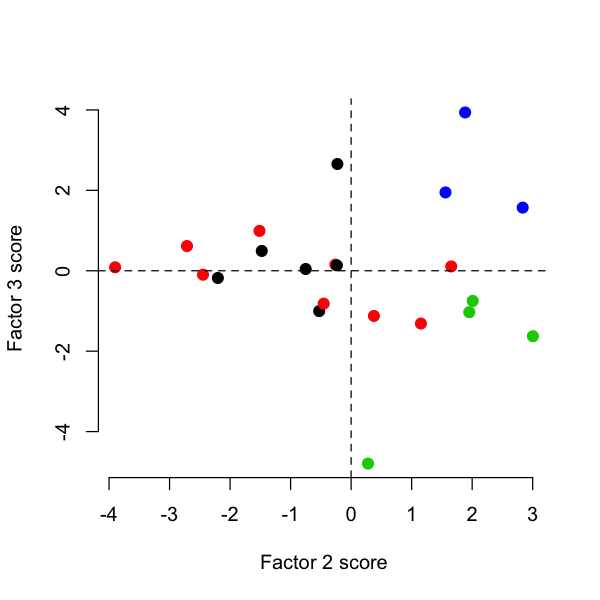

In [8]:
options(repr.plot.width=5, repr.plot.height=5)
plot(bpc$scores[,2],bpc$scores[,3],col=p$clustering,pch=19,bty='n',cex=1.2,
    xlab='Factor 2 score', ylab='Factor 3 score')
abline(v=0,h=0,lty=2)

**The 3 blue individuals score highly on both Factor 2 (Belief in free will, existential meaning, moral absolutism) and Factor 3 (Spirituality and Individualism), while the 4 green individuals score low on Factor 3.**

***We now plot the individual scores on Factors 3 and 4***

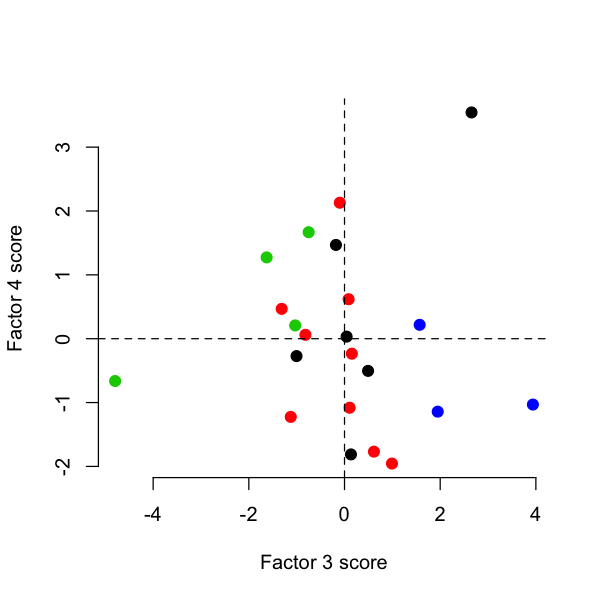

In [9]:
options(repr.plot.width=5, repr.plot.height=5)
plot(bpc$scores[,3],bpc$scores[,4],col=p$clustering,pch=19,bty='n',cex=1.2,
    xlab='Factor 3 score', ylab='Factor 4 score')
abline(v=0,h=0,lty=2)

**It seems that Factor 4 is unable to bring about any further separation between the groups, as the distribution of scores on Factor 4 overlap between all four clusters. Beyond noting that they score low on Factors 1 and 2, the 9 red individuals remain undifferentiated by any further clusters of belief.**

### Summary

**1. Factor analysis on the 10 questions is able to tease out clusters of beliefs among some, but not all, of our respondents.**

**2. The clearest distinguishing cluster belongs to those who score high on Factor 1 and low on Factor 2, what we might call the 'Skeptical Atheists' (non-religious, no existential meaning, no absolute moral standards). These individuals also tend to be strong egalitarians.**

**3. The next belief cluster belongs to individuals who score highly on Factor 2 (non-religious, epistemological certainty, belief in free will). They may score high or low on Factor 1 thus we are not able to infer a commonality with regards to existential meaning and moral relativity. Nevertheless, these individuals can be said to be 'Optimist Atheists'.**

**4. Within the Optimist Atheist group, individuals are distinguished between those who score highly or lowly on Factor 3 (Spirituality and Individualism). Thus we might infer a subgroup of 'Spiritually Inclined/Individualist Optimist Atheists', but the number of individuals accounted by this distinction are very few.**

**5. There are hence 2, maybe 3 core dimensions of belief within this group. Outside of these, the remaining individuals do not seem to segregate into well-defined clusters as their scores on the rest of the factors (Factor 4 onwards) overlap with those of the other clusters.**

**6. The most clarifying questions with regards to differentiating beliefs within our little group hence are: Existential Meaning, Moral Absolutism, Belief in Free Will, Epistemological Certainty, and to some extent Spirituality and Individualism. Incidentally these are also the questions whose scores tend to split right down the middle. Conversely, we all tend to be Non-religious, Egalitarian, Democratic, and Materialists of the Mind to varying degrees.**
